# Лабораторная работа №3. Регрессионный анализ данных

## Ковалев Егор 19-ИВТ-3
## Вариант 9
### Цель лабораторной работы – получение навыков работы с методами регрессии
Задания:

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой из схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_iris = pd.read_csv("iris.data.txt", sep=',')
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Задание 1

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

## Задание 2

In [3]:
print("Number of rows before deleting clones: ", df_iris.shape[0])

Number of rows before deleting clones:  150


In [4]:
df_iris.drop_duplicates(keep = 'first', inplace = True)

In [5]:
print("Number of rows after deleting clones: ", df_iris.shape[0])

Number of rows after deleting clones:  147


## Задание 3

<AxesSubplot:>

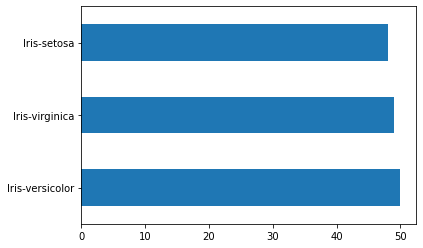

In [6]:
df_iris['Species'].value_counts().plot(kind='barh')

Данные сбалансированны, поэтому берем ROC кривую

## Задание 4

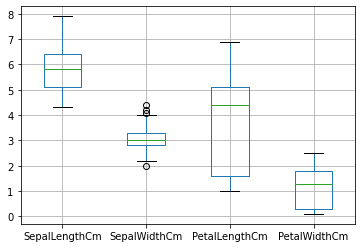

In [7]:
df_iris.boxplot()
plt.show()

In [8]:
#Отдeлим числовые признаки от категориальных

from sklearn.preprocessing import MinMaxScaler
numerical_columns = [i for i in df_iris.columns[0:4] if df_iris[i].dtype.name != 'object']
#произведем нормализацию числовых признаков
scaler = MinMaxScaler()
df_iris[numerical_columns] = scaler.fit_transform(df_iris[numerical_columns])
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


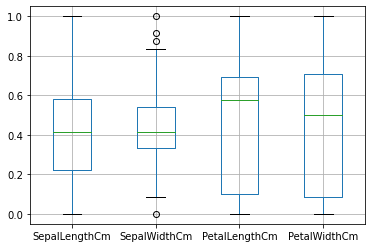

In [9]:
df_iris.boxplot()
plt.show()

## Задание 5

In [10]:
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [11]:
encoder = LabelEncoder()
df_iris['Species'] = encoder.fit_transform(df_iris['Species'])
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


## Задание 6

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


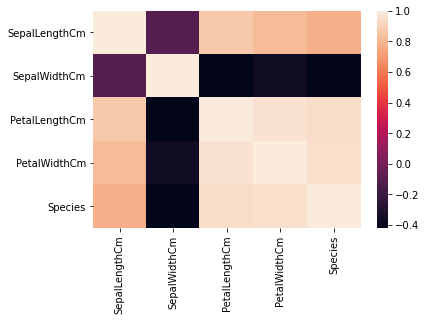

In [12]:
sns.heatmap(df_iris.corr())
df_iris.corr()

Ничего не удаляем, тк данные коррелируют с целевой переменной

## Задание 7

Все ячейки заполнены, пропусков нет

## Задание 8

In [13]:
x = np.array(df_iris.drop('Species', axis=1)) # Разделим полученные данные на данные для обучения и теста
y = np.array(df_iris['Species']) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [14]:
rnc = RadiusNeighborsClassifier(outlier_label= 1) # Найдем оптимальный радиус для классификатора ближайших соседей

params = {'radius': np.arange(0, 10, 0.1)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label= 1, radius=best_radius)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9457142857142857 	 at radius: 0.4
test score:  0.918918918918919


In [15]:
dtc = DecisionTreeClassifier() # Найдем оптимальные глубину и количества учитываемых параметров для классификатора 
                               # решающее дерево
params = {'max_depth': list(range(1,5)), 'max_features': list(range(1,5))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)
dtc.predict(X_test)

best train score: 0.959047619047619 	 at features number: 3 	 at depth: 2
test score:  0.9459459459459459


array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 2, 2])

In [20]:
from sklearn.metrics import accuracy_score
classifier = RadiusNeighborsClassifier(radius=0.9, n_jobs=-1, outlier_label=1).fit(X_train, y_train)
pred = classifier.radius_neighbors(X_test)[0]
y_test = label_binarize(y_test, classes=[0, 1, 2])
for i in range(len(pred)):
    pred[:][i] = min(pred[:][i]), max(pred[:][i]), np.mean(pred[:][i])

In [17]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
      
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),3), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1, 2]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

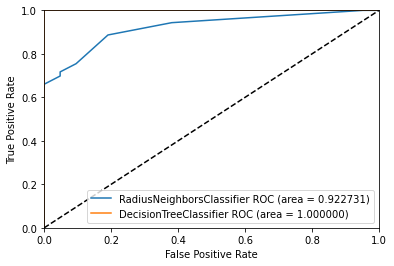

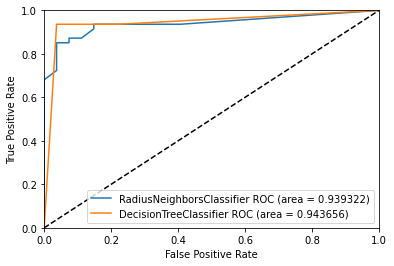

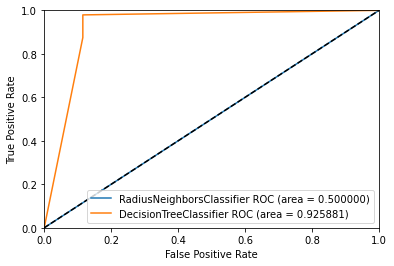

In [18]:
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc = mrnc.predict_proba(X_test, X_train, y_train)

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc = dtc.fit(X_train, y_train).predict_proba(X_test)

for i in range(3):
    tpr, fpr, thresholds = roc_curve(y_test[:,i], -probas_mrnc[:,i])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

    tpr, fpr, thresholds = roc_curve(y_test[:,i], -probas_dtc[:,i])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

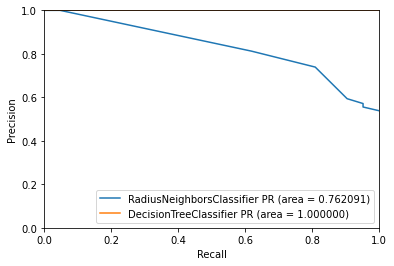

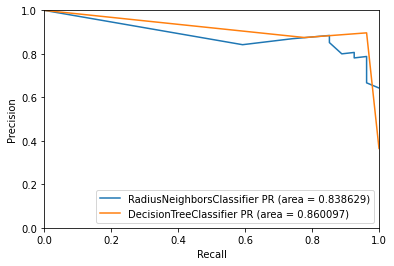

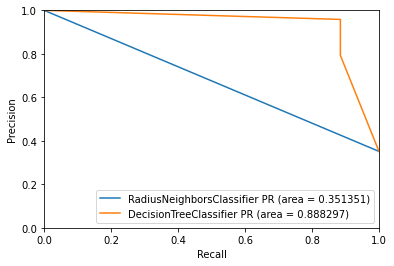

In [19]:
for i in range(3):
    precision, recall, thresholds = precision_recall_curve(y_test[:,i], probas_mrnc[:,i]) # K соседей
    aps_mrnc1 = average_precision_score(y_test[:,i],probas_mrnc[:,i])
    plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 

    precision, recall, thresholds = precision_recall_curve(y_test[:,i], probas_dtc[:,i]) # Решающее дерево
    aps_dtc1 = average_precision_score(y_test[:,i],probas_dtc[:,i])
    plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

    plt.xlabel('Recall') # Вывод графика
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc=4, fontsize='medium')
    plt.show()

## Задание 9

Классификаторы "Бинарное рещающее дерево" и "Метод k ближайших соседей(по радиусу)" имеют примерно одинаковые показатели качества относительно PR и ROC кривых.